In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("G:\Thufayl\House Price Prediction\housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace = True)

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis = 1)
Y = data["median_house_value"]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [10]:
train_data = X_train.join(Y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13666,-117.29,34.03,9.0,8185.0,1525.0,3630.0,1466.0,4.1667,INLAND,197700.0
17314,-120.27,34.72,14.0,1289.0,277.0,693.0,237.0,3.2569,<1H OCEAN,230800.0
16138,-122.46,37.78,52.0,4140.0,984.0,2030.0,892.0,3.4236,NEAR BAY,376800.0
7510,-118.27,33.89,32.0,1969.0,397.0,1349.0,370.0,4.4659,<1H OCEAN,138100.0
10934,-117.90,33.74,24.0,2932.0,955.0,5516.0,911.0,2.7535,<1H OCEAN,111000.0
...,...,...,...,...,...,...,...,...,...,...
15303,-117.36,33.17,24.0,2046.0,442.0,812.0,367.0,2.3182,NEAR OCEAN,500001.0
4964,-118.28,34.00,46.0,1650.0,463.0,1992.0,458.0,2.3403,<1H OCEAN,114100.0
9784,-121.39,36.16,28.0,1057.0,249.0,288.0,130.0,3.0526,NEAR OCEAN,146900.0
10187,-117.95,33.87,22.0,1432.0,335.0,746.0,296.0,2.0227,<1H OCEAN,55000.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

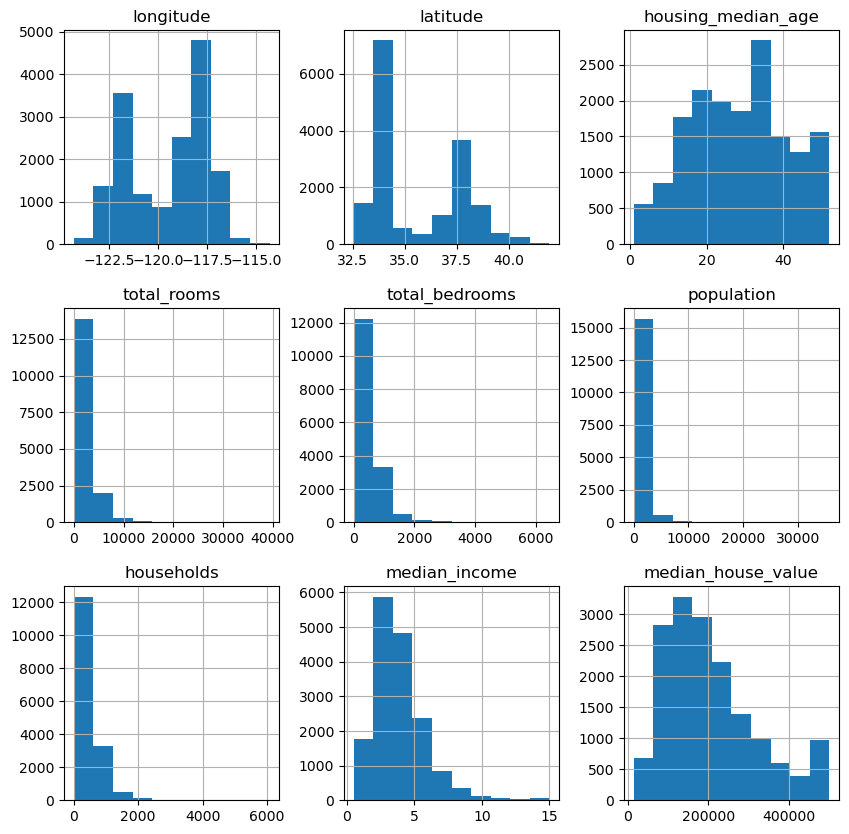

In [14]:
train_data.hist(figsize=(10,10))

<AxesSubplot:>

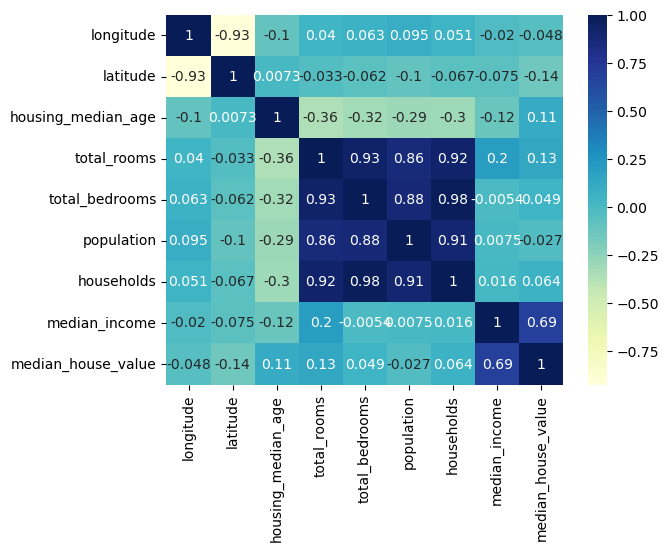

In [15]:
sns.heatmap(train_data.corr(), annot = True, cmap ="YlGnBu")

In [21]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"],axis = 1)

<AxesSubplot:>

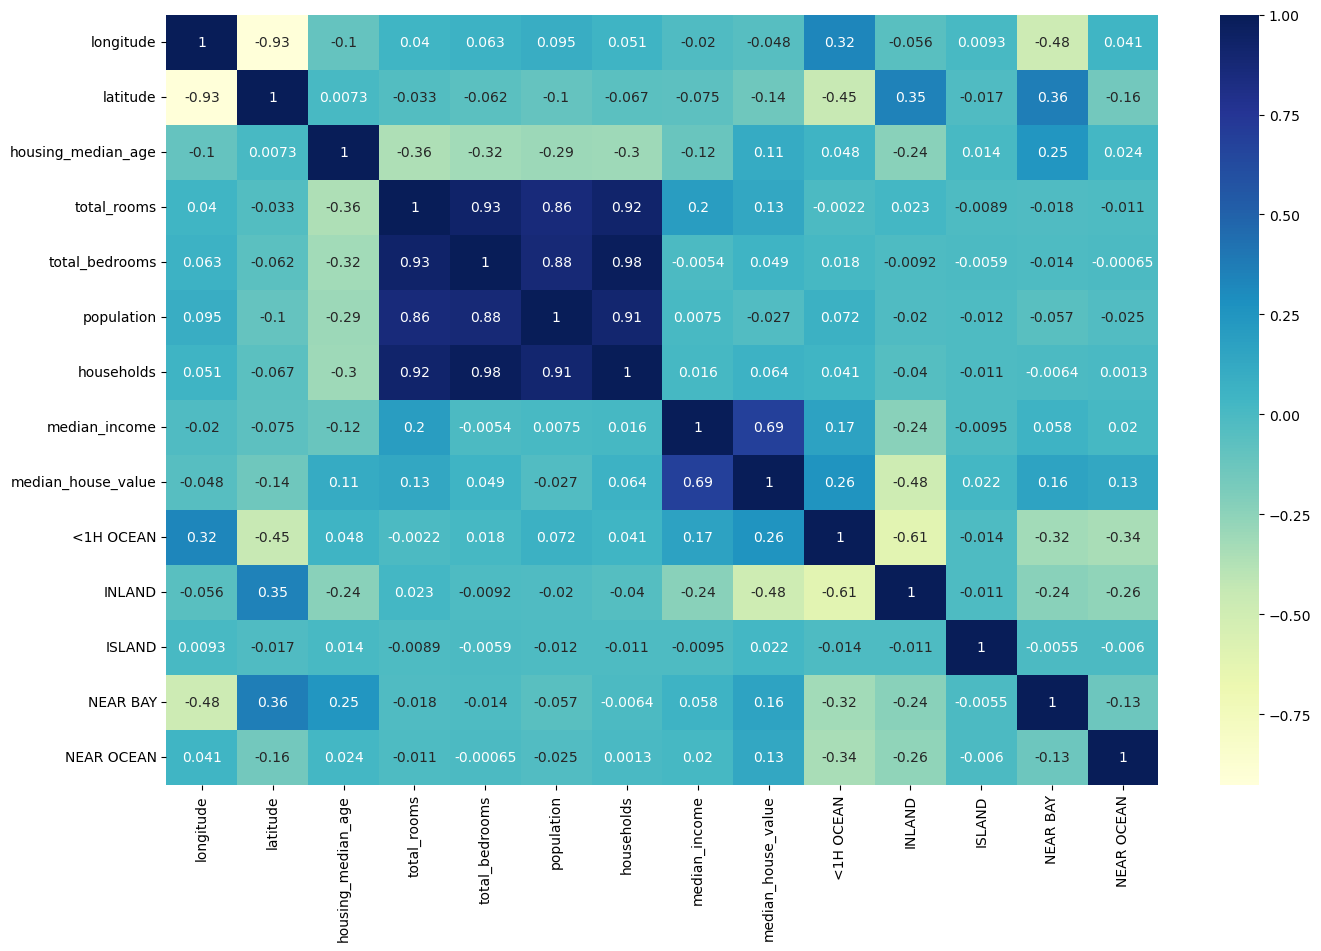

In [25]:
plt.figure(figsize = (16,10))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [31]:
from sklearn.linear_model import LinearRegression

#X_train,Y_train = train_data.drop(["median_house_value"],axis = 1),train_data["median_house_value"]
reg = LinearRegression()


In [32]:
reg.fit(X_train,Y_train)

LinearRegression()

In [33]:
test_data = X_test.join(Y_test)

test_data =  test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"],axis = 1)

In [36]:
X_test, Y_test = test_data.drop(["median_house_value"],axis = 1),test_data["median_house_value"]

In [38]:
reg.score(X_test,Y_test)

0.6600689624186966

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
forest = RandomForestRegressor()

forest.fit(X_train,Y_train)

RandomForestRegressor()

In [41]:
forest.score(X_test,Y_test)

0.8259422916371593